In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [47]:
#定义一个logisticregression类
class LogisticRegression:
    def __init__(self):
        #初始化模型
        self.coef = None  #定义系数
        self.intercept = None  #定义截距项
        self.theta = None  #定义参数合集

    def sigmoid(self, x):
        #定义sigmoid函数
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train, eta=0.01, n_iters=10000):
        #定义训练方法，梯度下降
        assert X_train.shape[0] == y_train.shape[0]

        #定义损失函数
        def J(theta, X_b, y):
            y_hat = self.sigmoid(X_b.dot(theta))
            #计算交叉熵损失,1e-7防止出现溢出
            return -np.sum(y * np.log(y_hat+1e-7 ) - (1 - y) * np.log(1 - y_hat +1e-7)) / len(y)
            # try:
            # # 计算交叉熵损失
            #     return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
            # except:
            # # 处理数值溢出情况（如log(0））
            #     return float('inf')
        #计算梯度
        def dJ(theta, X_b, y):
            return X_b.T.dot(self.sigmoid(X_b.dot(theta)) - y) / len(y)

        #梯度下降
        def J_GD(X_b, y, initial_theta, eta, n_iters=1000, epsilon=1e-8):
            theta = initial_theta
            cur_iters = 0
            while cur_iters < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                #当损失变化很小的时候停止

                if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
                    break
                cur_iters += 1
            return theta

        #添加偏置项
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])

        initial_theta = np.zeros(X_b.shape[1])  #定义初始化参数为X_train的列

        #执行梯度下降
        self.theta = J_GD(X_b, y_train, initial_theta, eta, n_iters)
        #分离截距项和系数
        self.intercept = self.theta
        self.coef = self.theta[1:]

        return self

    def predict_proba(self, X_predict):
        #计算预测概率
        assert self.intercept is not None and self.coef is not None, "请训练模型"
        assert X_predict.shape[1] == len(self.coef), '特征数量不匹配'

        #添加偏置项
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])

        return self.sigmoid(np.dot(X_b, self.theta))
        #return self.sigmoid(X_b.dot(self.theta))

    def predict(self, X_predict):
        #计算二分类结果
        assert self.intercept is not None and self.coef is not None, "请训练模型"
        assert X_predict.shape[1] == len(self.coef), '特征数量不匹配'
        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')

    def score(self, X_test, y_test):
        #计算模型准确率
        y_predict = self.predict(X_test)
        return np.sum(y_predict == y_test) / len(y_test)

    def __repr__(self):
        return "LogisticRegression()"

In [42]:
#加载鸢尾花数据
iris = datasets.load_iris()

In [43]:
X = iris.data
y = iris.target
X = X[y < 2, :2]
y = y[y < 2]

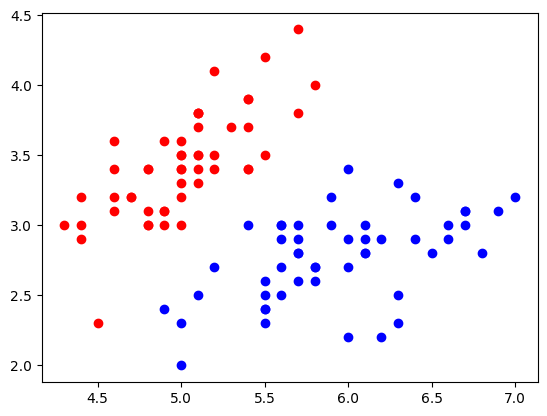

In [48]:
#选择分类并展示
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

In [53]:
#分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
#定义模型类
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
#查看得分
model.score(X_test, y_test)

1.0

In [55]:
model.predict_proba(X_test)

array([0.88905679, 0.96895387, 0.21095353, 0.04128158, 0.07508952,
       0.04473232, 0.09328853, 0.9894529 , 0.95710672, 0.71027052,
       0.08643097, 0.01188062, 0.31831551, 0.07508952, 0.79626174,
       0.75785793, 0.78481915, 0.37176906, 0.11459689, 0.26925361,
       0.05174517, 0.23754539, 0.95710672, 0.97285329, 0.13360344])

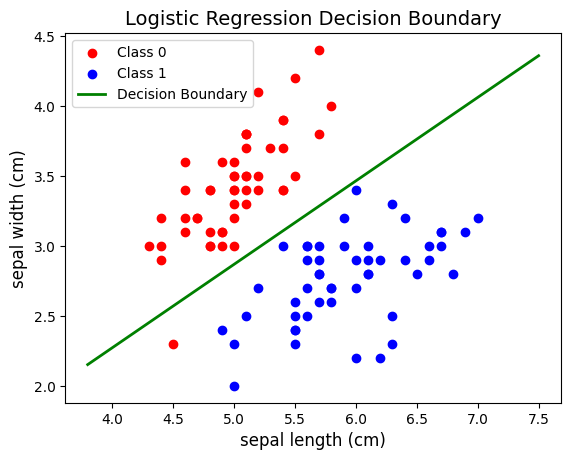

In [57]:
#可视化最后结果
#plt.figure(figsize=(8, 6))

# 绘制原始数据点
plt.scatter(X[y==0, 0], X[y==0, 1], color="red", label="Class 0")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue", label="Class 1")

# 生成决策边界线
x1 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
theta = model.theta  # 获取训练好的参数 [θ0, θ1, θ2]
x2 = (-theta[0] - theta[1] * x1) / theta[2]  # θ0 + θ1*x1 + θ2*x2 = 0

# 绘制决策边界
plt.plot(x1, x2, color="green", linewidth=2, label="Decision Boundary")

# 设置坐标轴标签和图例
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)
plt.legend(loc="best")
plt.title("Logistic Regression Decision Boundary", fontsize=14)
plt.show()